<a href="https://colab.research.google.com/github/pmgumble/EDA/blob/master/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

Exploratory Data Analysis on dataset Global Terrorism

Objective
Terrorism is a threat of violence that creates fear in a population. It is also important to understand that all violent acts are not terrorist acts.

As a security/defense analyst,find out the hot zone of terrorism and derive some security issues and insights by EDA.

TABLE OF CONTENTS:
1. What this data set is all about?
2. Installation of libraries and dataset
3. Basic Analysis
4. Motive behind activities related to terrorism
5. Number of terrorist activities occured in region with respect to year
6. Number of terrorist activities vs Year
7. Who are the main targets?
8. Hot zones of terrorism by country and city
9. What are the attacking methods used?
10. Attacks vs Killed
11. Most Notorious Groups
12. Activity of Top Terrorist Groups
13. Conclusion

1. What this data set is all about?
Consists Information on more than 180,000 Terrorist Attacks.

Includes information on terrorist attacks around the world from 1970 to 2017.

Includes systematic data on domestic as well as international terrorist incidents that have occurred during specific time period.

2. Installation of libraries and dataset

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import plotly.express as px

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
path = "/content/drive/My Drive/Colab Notebooks/Capstone_Project/EDA/Global_Terrorisam_Analysis/GlobalTerrorismData.csv"
df=pd.read_csv(path, encoding='ISO-8859-1')

In [54]:
df.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [55]:
# NUmber of rows and columns in data set
print("Number of rows:",df.shape[0])
print("Number of columns:",df.shape[1])

Number of rows: 181691
Number of columns: 135


In [56]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [57]:
# Data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [58]:
# Statistical analysis
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
df.shape


(181691, 135)

3. Data preperation and Cleaning

In [60]:
# Checking th null values
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [61]:
#Finding null values
Total_Number = df.isna().sum().sort_values(ascending = False)
Percentage =  ((df.isna().sum()/ df.isna().count())*100).sort_values(ascending=False)
Data_missing = pd.concat([Total_Number,Percentage],axis = 1, keys=['Total','Percentage'])
Data_missing.head(3)


,Total,Percentage
gsubname3,181671,99.988992
weapsubtype4_txt,181621,99.961473
weapsubtype4,181621,99.961473


Since most of the columns contain Null Values , selecting only those columns which will be useful in our Data exploration Journey

In [62]:
#Selecting significant columns
features = ['iyear','imonth','iday', 'extended','country_txt','region_txt','city',
      'latitude','longitude','success','suicide', 'attacktype1_txt', 'targtype1_txt', 'target1','natlty1_txt', 'gname', 
      'weaptype1_txt','nkill','motive']

data = df[features]

In [84]:
#Renaming the columns for better interpretability 
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                         'attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary',
                         'gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df.head(5)

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,Casualty
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,1.0
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,PGIS,0,1,1,1,NaN,0.0
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,1.0
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,0.0
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,0.0


In [86]:
#Sorting Columns needed for the analysis form the dataframe
Terror=df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType',
                   'Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive','success']]

In [88]:
# concatinating the columns killed and wounded
Terror["Killed"]=Terror["Killed"].fillna(0)
Terror["Wounded"]=Terror["Wounded"].fillna(0)
Terror["Casualty"]=Terror["Killed"]+Terror["Wounded"]
Terror.head(5)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,success,Casualty
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,1,0.0
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,1,0.0


In [89]:
#Checking for null values
Terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed              0
Wounded             0
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
success             0
Casualty            0
dtype: int64

In [90]:
Terror.columns


Index(['Year', 'Month', 'Day', 'Country', 'Region', 'city', 'latitude',
       'longitude', 'AttackType', 'Killed', 'Wounded', 'Target', 'Summary',
       'Group', 'Target_type', 'Weapon_type', 'Motive', 'success', 'Casualty'],
      dtype='object')

In [91]:
#missing data in the selected columns
total = Terror.isnull().sum().sort_values(ascending=False)
percent = round(((Terror.isnull().sum()/Terror.isnull().count())*100),2).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data

,Total,Percent
Motive,131130,72.17
Summary,66129,36.40
longitude,4557,2.51
latitude,4556,2.51
Target,636,0.35
city,434,0.24
Year,0,0.00
success,0,0.00
Weapon_type,0,0.00
Target_type,0,0.00


In [96]:
# Filling the null values 
Terror['city'].fillna('Unknown',inplace =True)

Terror['Target'].fillna('Unknown',inplace =True)

Terror['Killed'].fillna(0,inplace =True)

In [98]:
Terror.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   city         181691 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   AttackType   181691 non-null  object 
 9   Killed       181691 non-null  float64
 10  Wounded      181691 non-null  float64
 11  Target       181691 non-null  object 
 12  Summary      115562 non-null  object 
 13  Group        181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
 16  Motive       50561 non-null   object 
 17  success      181691 non-null  int64  
 18  Casualty     181691 non-

3. Basic Analysis by using visulisation

In [99]:
Terror['Year'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017])

As we can see from above, the Data for the Year 1993 is not present for some unknown reason

In [100]:
# renaming labels from numerics to string for proper naming convention
Terror['success'] = Terror['success'].map({0:'Unsuccessful attempt', 1:'Successful attempt'} )

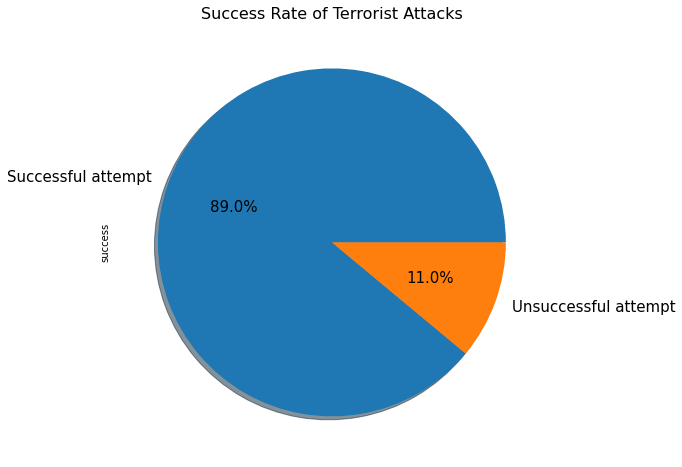

In [101]:
# Plotting the success percentage of all the attacks happened 
plt.figure(figsize=(8,8))
data['success'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True, fontsize=15)
plt.title('Success Rate of Terrorist Attacks',fontsize = 16)
plt.show()

The Success Rate of the terrorist attacks is 89%, which is a big issue of concern for the safety of citizens and organisations who are responsible for the safety of everyone.Let's explore more about these attacks...

Let's start with the number of attacks in every year

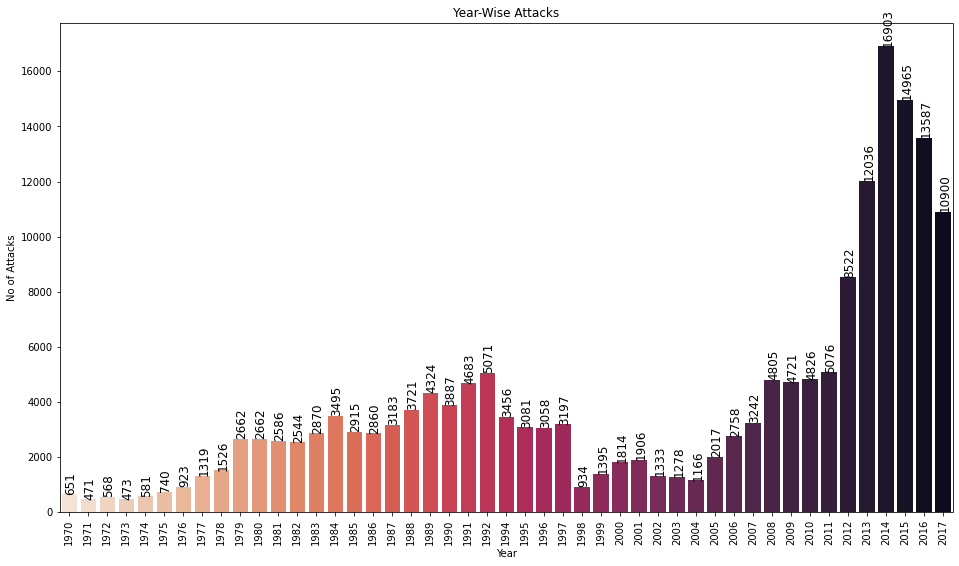

In [102]:
plt.figure(figsize = (16,9))
ax = sns.countplot(Terror['Year'], palette = 'rocket_r')
plt.xticks(rotation = 90)
plt.ylabel("No of Attacks") 
plt.title("Year-Wise Attacks")

for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+100), rotation = 90, size =12)

plt.show()

Here we can see that the abundance of terror attacks happened in the twenty-tens. This might indicate that number attacks increased as weapons got fairly advanced. The more damage the weapons cause, the more opportunity and reason the perpetrator sees. This can be called as a logical assumption for now.

Attacks in various Countries and Regions

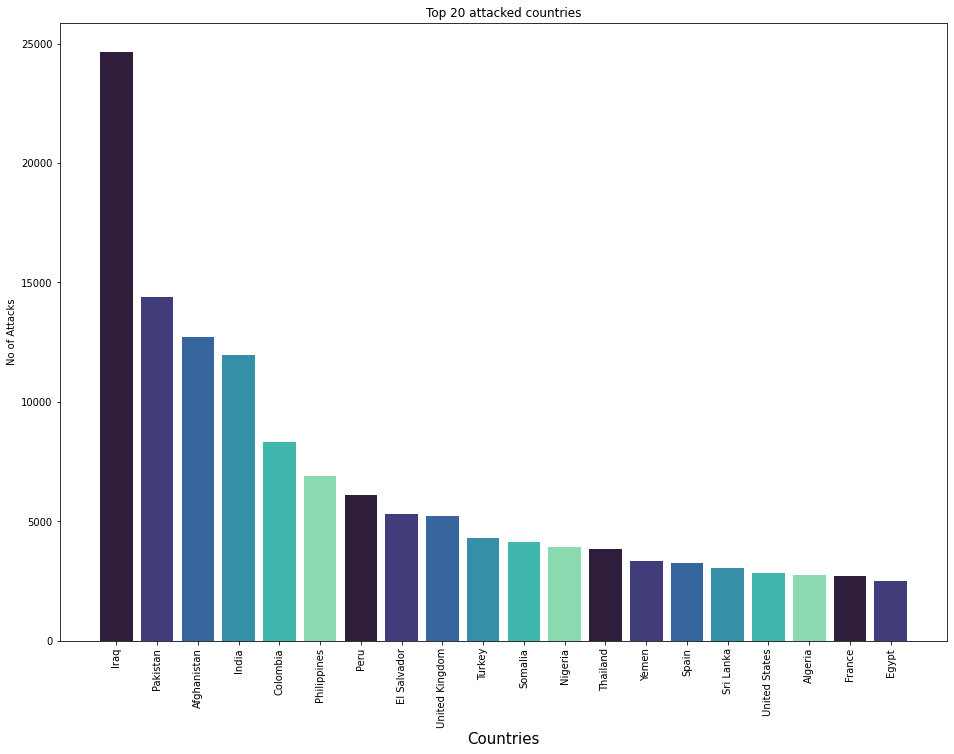

In [112]:
fig = plt.figure(figsize = (35,25))
ax1 = fig.add_subplot(221)
ax1.bar(x = Terror['Country'].value_counts().index[:20], height = Terror['Country'].value_counts()[:20], color = sns.color_palette('mako'))
plt.xticks(rotation = 90)
plt.xlabel("Countries", fontsize = 15)
plt.ylabel("No of Attacks")
ax1.title.set_text('Top 20 attacked countries')

2.Which region has highest terrorirst attacks?

In [109]:
colors = ['lightslategray',] * 13
colors[11] = 'dodgerblue'
x=Terror['Region'].value_counts().sort_values().index
y=Terror['Region'].value_counts().sort_values()
fig = go.Figure(data=[go.Bar(
    x=y.tolist(),
    y=x.tolist(),
    marker_color=colors,text=y,orientation='h',
            textposition='auto'  # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='Regions having highest terrorist attacks', xaxis_title="Regions",
    yaxis_title="Sum of occurences",)

Regions attacked across the years

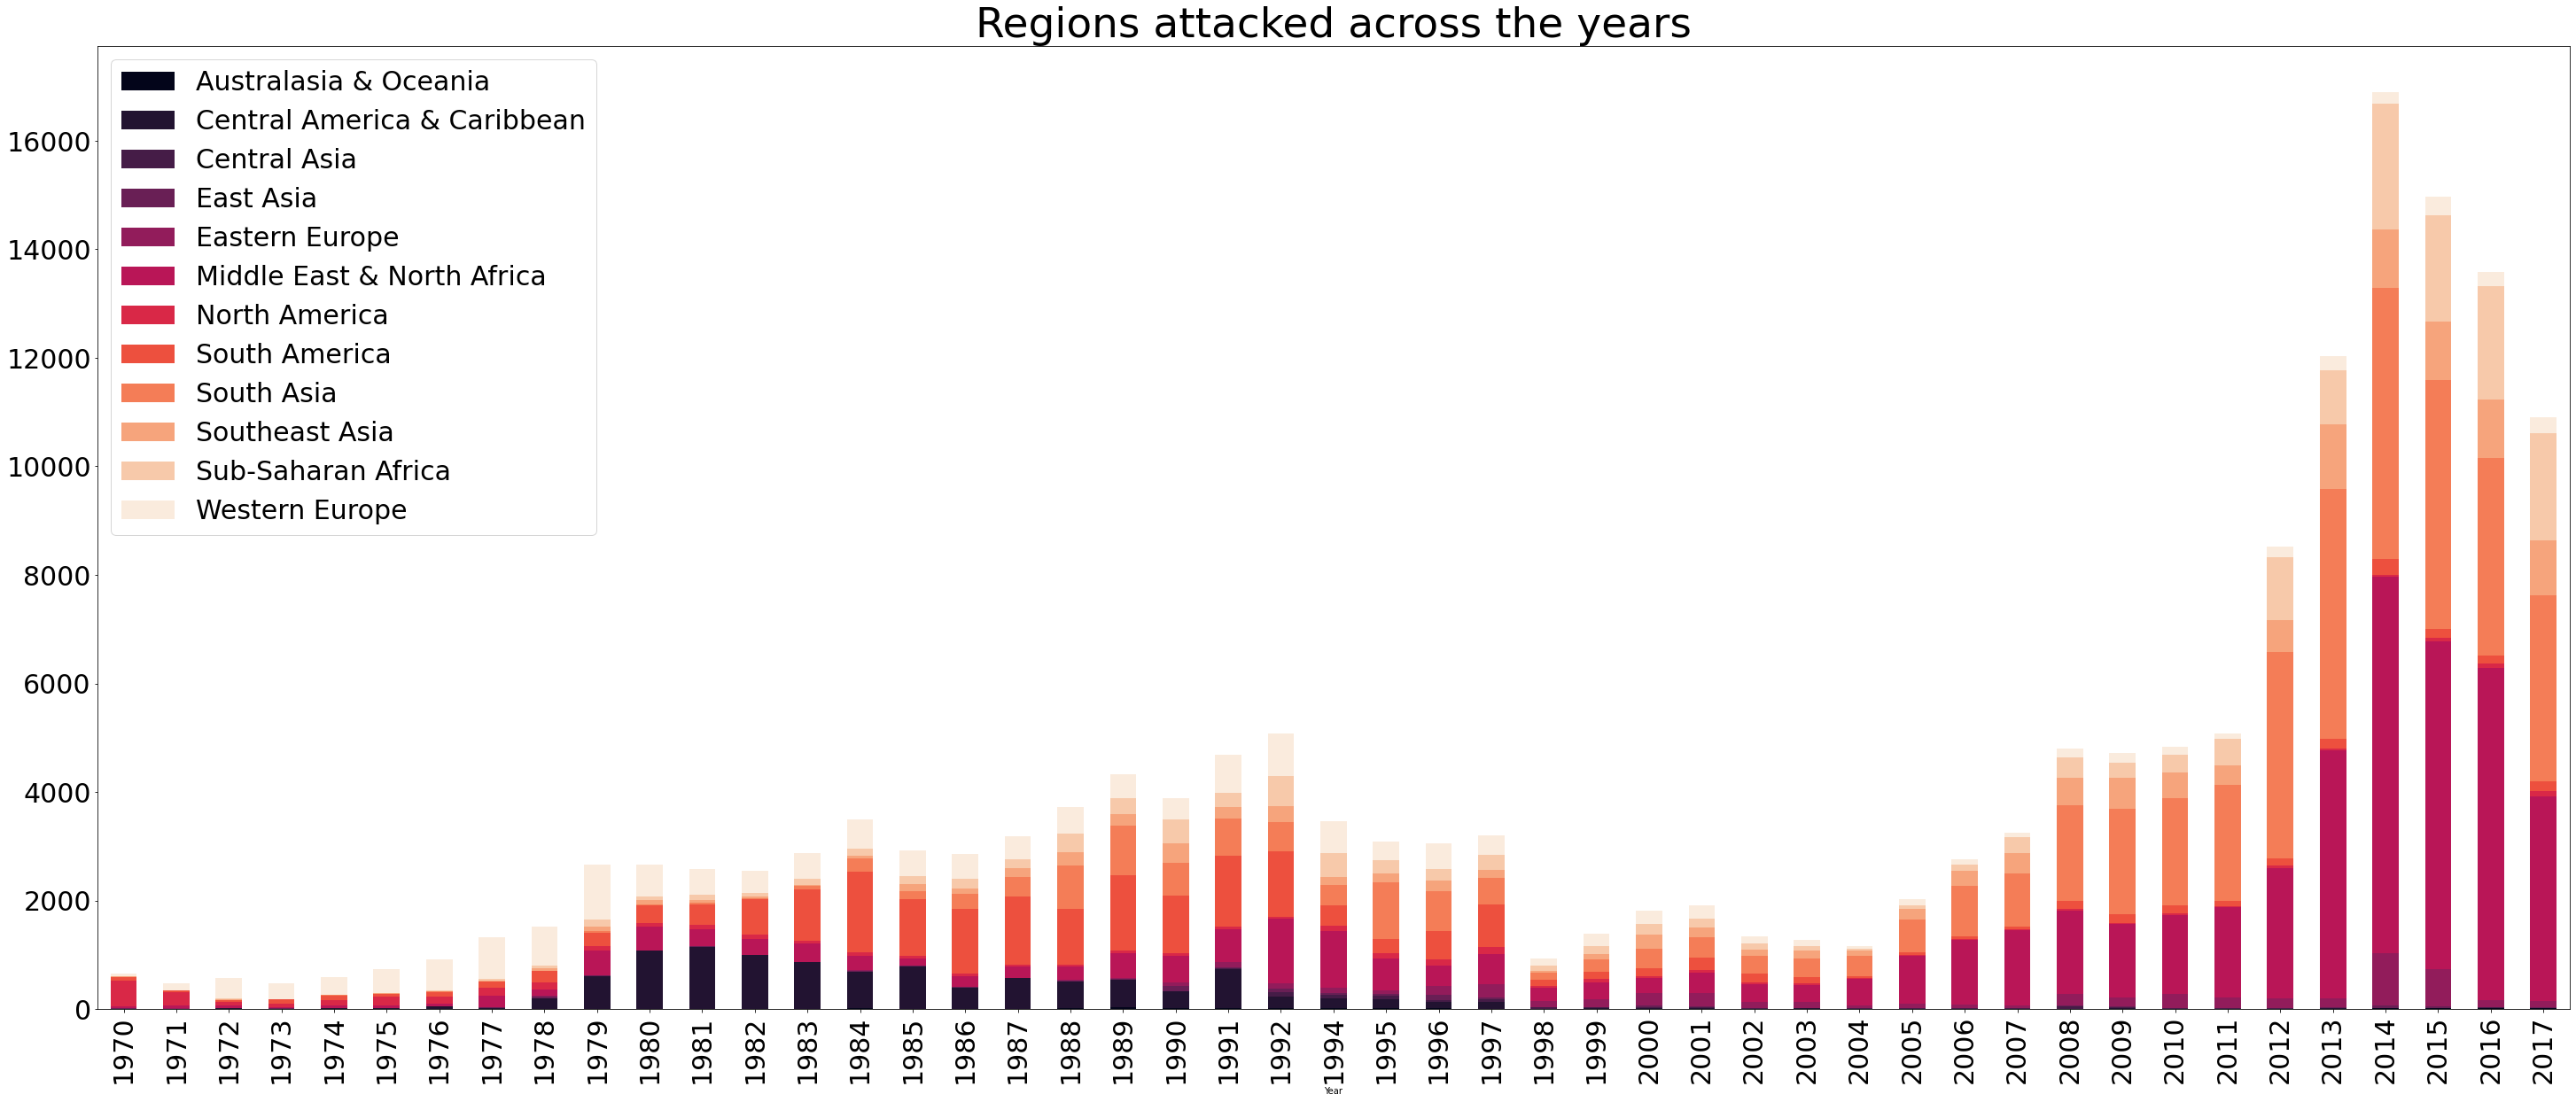

In [129]:
df = Terror.groupby(['Region', 'Year']).size().reset_index().pivot(columns='Region', index='Year', values=0)
df.plot(kind = 'bar', stacked = True, figsize = (50,20), colormap = 'rocket')
plt.legend(loc=2, prop = {'size':30})
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.title("Regions attacked across the years", fontsize = 47)
plt.show()

3.Which is the most weapon used by terrorirsts ?

In [113]:
Terror['Weapon_type'] = Terror['Weapon_type'].replace(['Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'],'Vehicles')
colors = ['lightslategray',] * 11
colors[0] = 'cyan'
x=Terror['Weapon_type'].value_counts().index
y=Terror['Weapon_type'].value_counts()
fig = go.Figure(data=[go.Bar(
    x=x.tolist(),
    y=y.tolist(),
    marker_color=colors,text=y,
            textposition='auto'  # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='Weapons used by terrorists', xaxis_title="Weapons",
    yaxis_title="Sum of occurences",)

7. Who are the main targets?

In [115]:
colors = ['lightslategray',] * 22
colors[0] = 'cyan'
x=Terror['Target_type'].value_counts().index
y=Terror['Target_type'].value_counts()
fig = go.Figure(data=[go.Bar(
    x=x.tolist(),
    y=y.tolist(),
    marker_color=colors  # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='Main Targets', xaxis_title="Targets",
    yaxis_title="Sum of occurences",)

Military and Private Citizens seem to be the most common target for many active terror groups

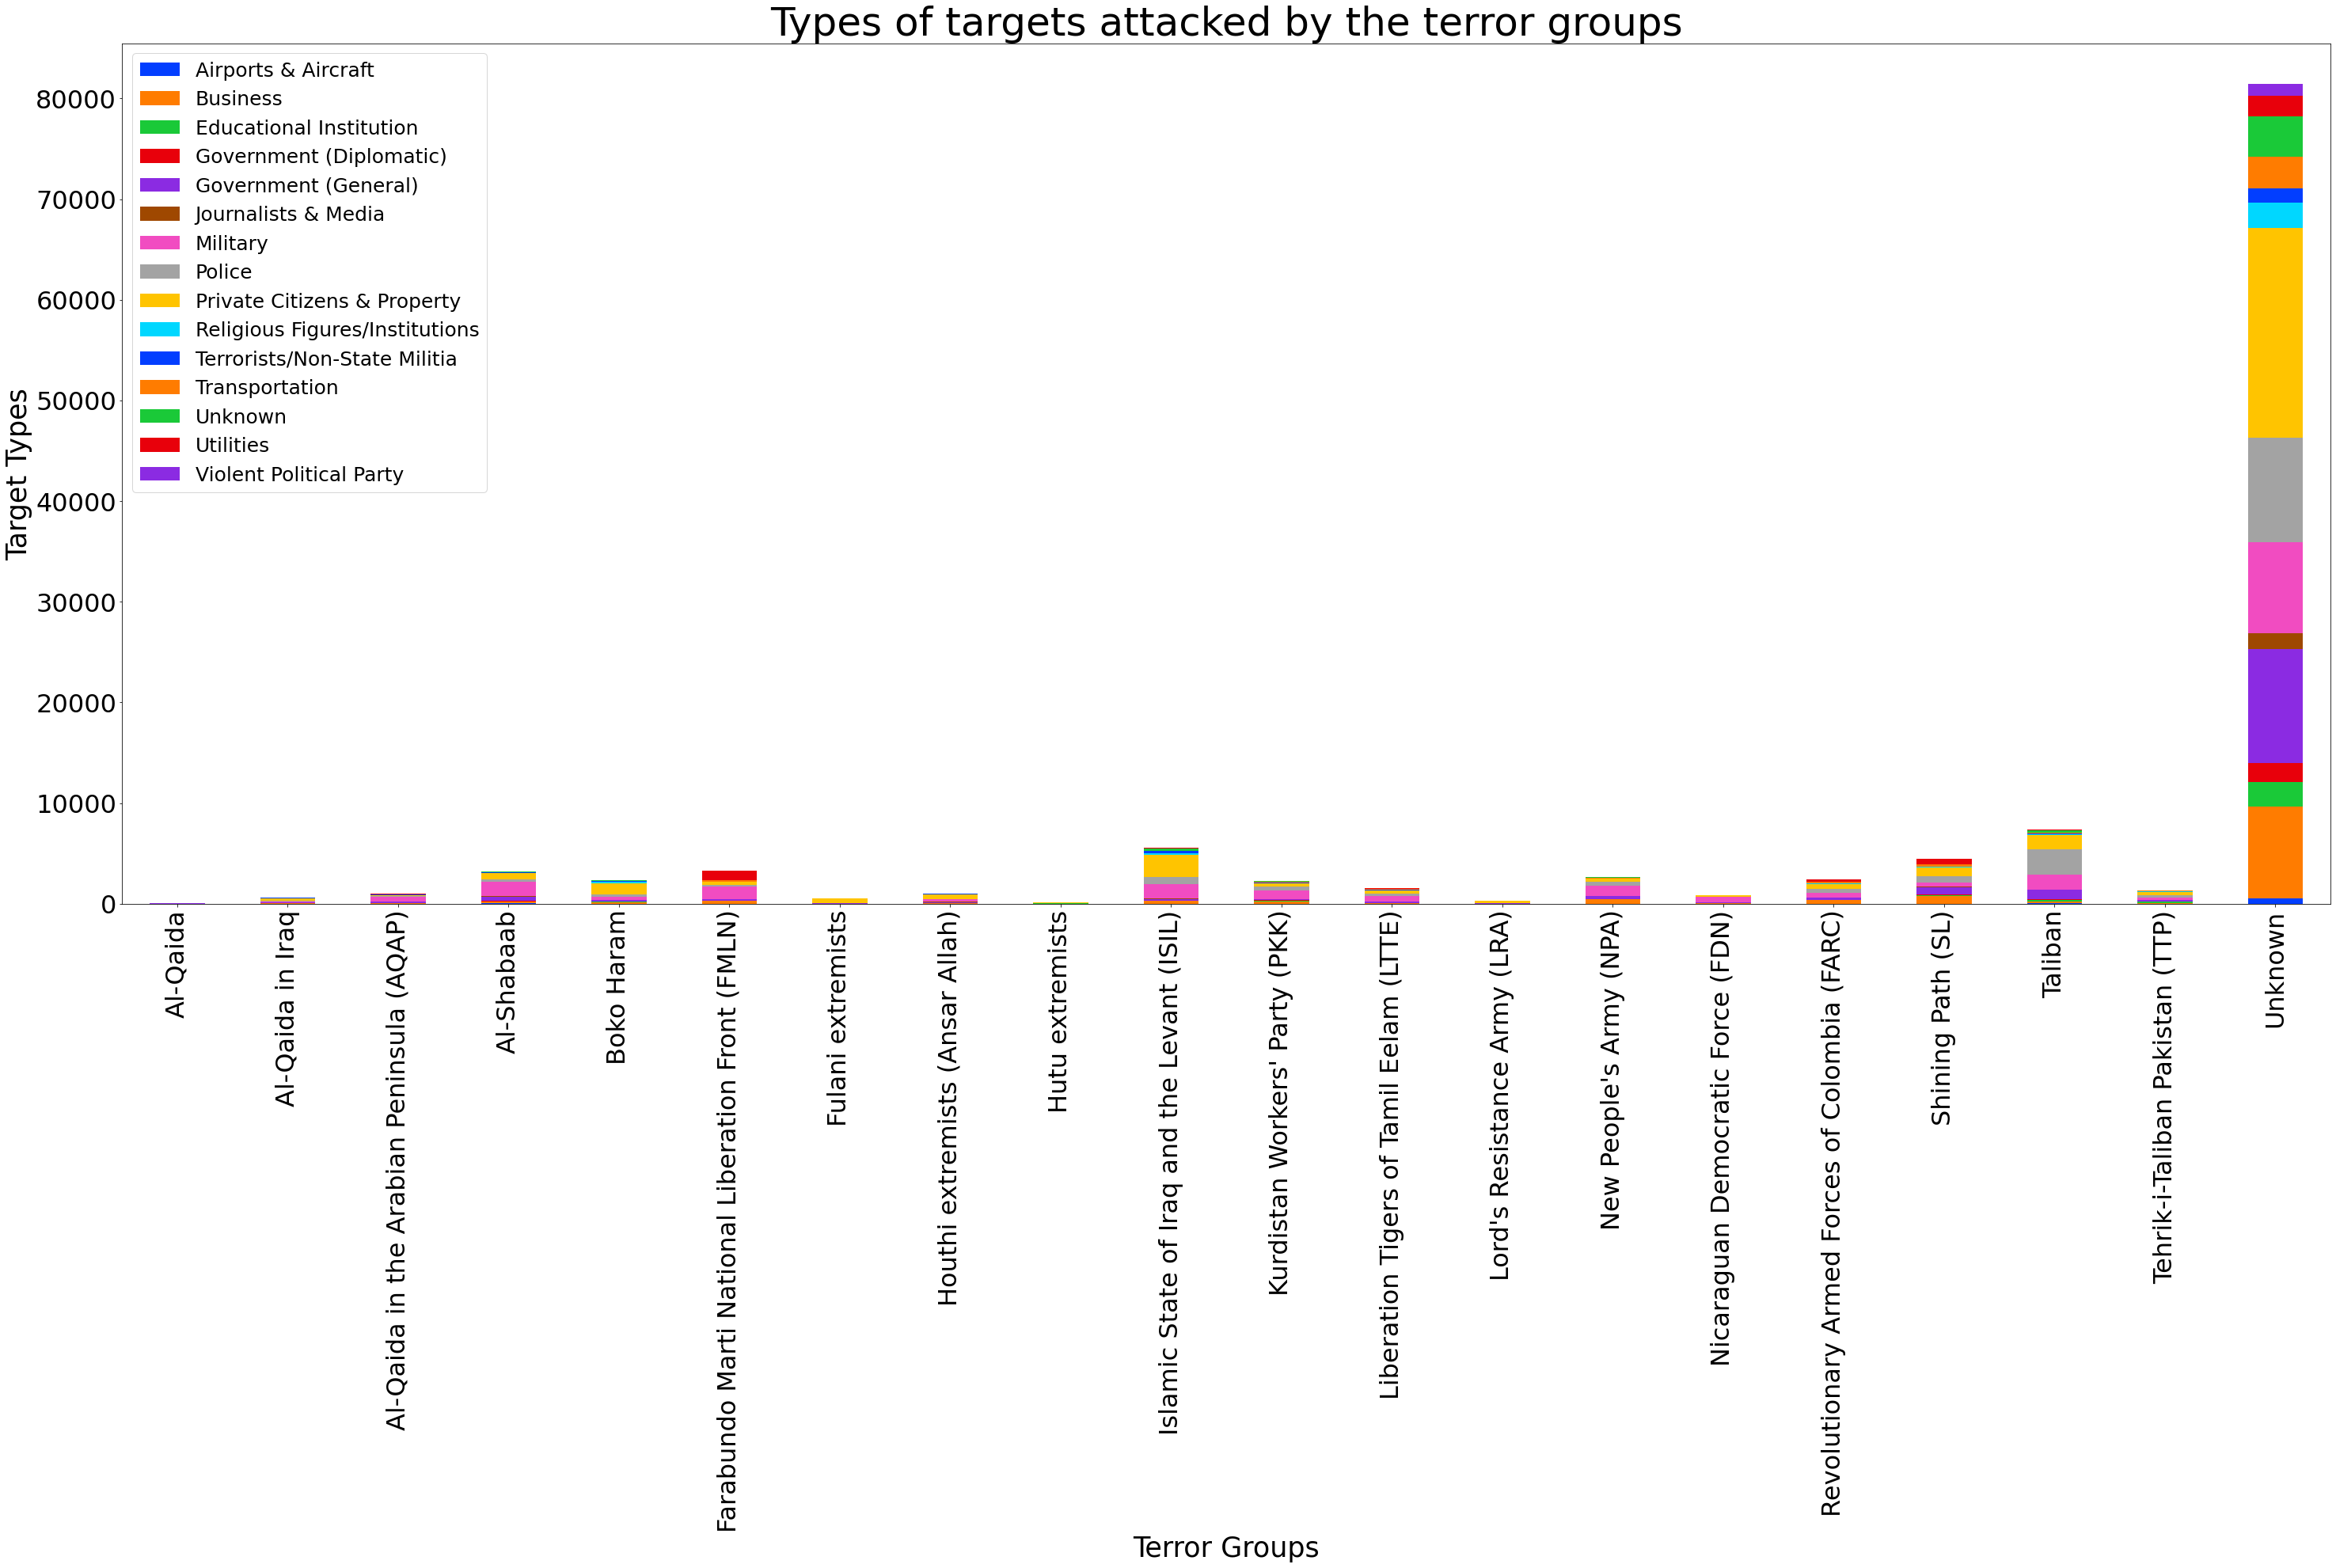

In [136]:
top20 = Terror[['Group','Killed']].groupby(by = 'Group').sum().nlargest(20, 'Killed')
df4 = Terror[Terror['Group'].isin(list(top20.index))]
df4 = df4[df4['Target_type'].isin(list(Terror['Target_type'].value_counts().index[:15]))]
df4 = df4.groupby(['Target_type', 'Group']).size().reset_index().pivot(columns='Target_type', index='Group', values=0)
df4.plot(kind = 'bar', stacked = True, figsize = (50,20),color= sns.color_palette('bright'))
plt.legend(loc=2, prop = {'size':25})
plt.xlabel("Terror Groups", fontsize = 35)
plt.xticks(fontsize = 32)
plt.yticks(fontsize = 32)
plt.ylabel("Target Types", fontsize = 35)
plt.title("Types of targets attacked by the terror groups", fontsize = 50)
plt.show()

Hot zones of terrorism (by Country)

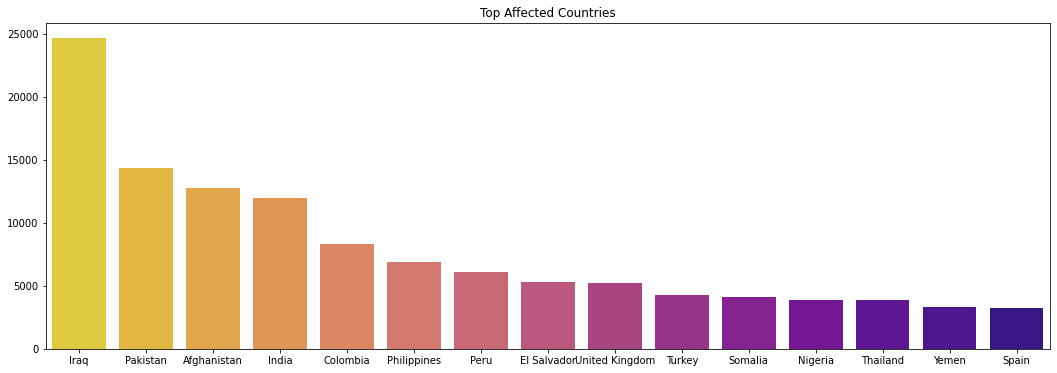

In [117]:
plt.subplots(figsize=(18,6))
sns.barplot(Terror['Country'].value_counts()[:15].index,Terror['Country'].value_counts()[:15].values,palette='plasma_r')
plt.title('Top Affected Countries')
plt.show()

Hot zones of terrorism (by City)

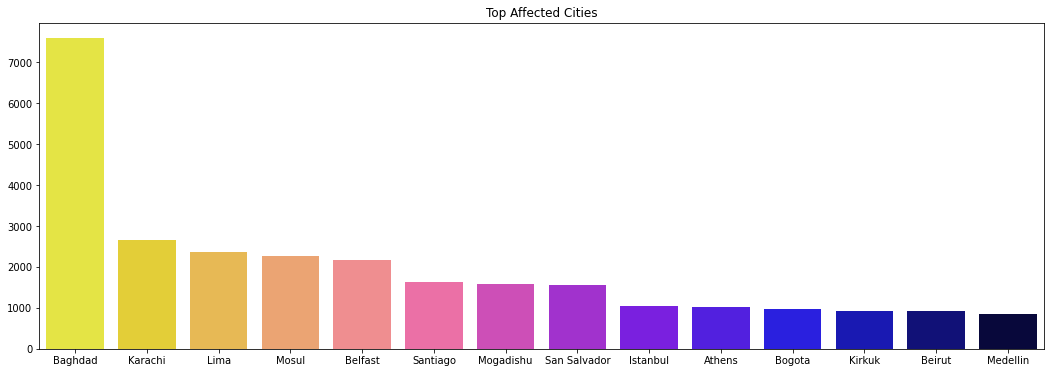

In [118]:
plt.subplots(figsize=(18,6))
sns.barplot(Terror['city'].value_counts()[1:15].index,Terror['city'].value_counts()[1:15].values,palette='gnuplot2_r')
plt.title('Top Affected Cities')
plt.show()

What are the attacking methods used?

In [120]:
colors = ['lightslategray',] * 22
colors[0] = 'darkblue'
x=Terror['AttackType'].value_counts().index
y=Terror['AttackType'].value_counts()
fig = go.Figure(data=[go.Bar(
    x=x.tolist(),
    y=y.tolist(),
    marker_color=colors  # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='Main Targets', xaxis_title="Targets",
    yaxis_title="Sum of occurences",)

Attacks vs Killed

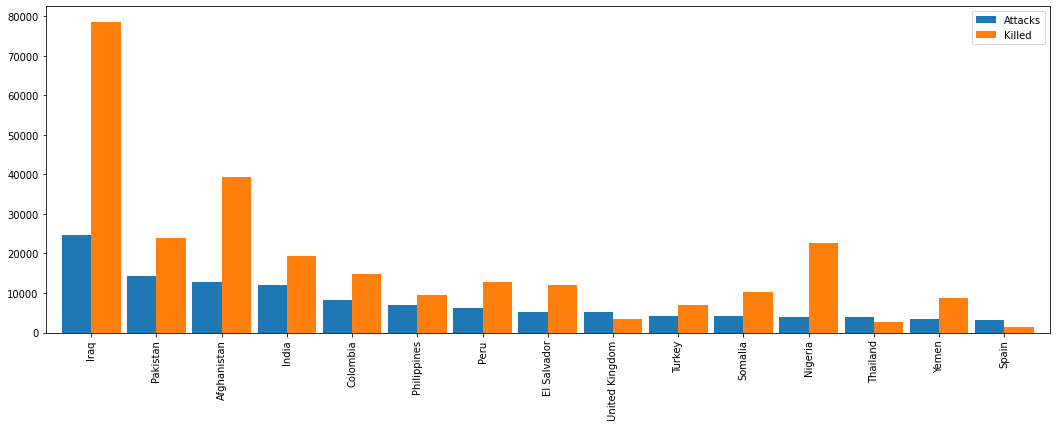

In [121]:
coun_terror=Terror['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=df.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

Most Notorious Groups

In [122]:
colors = ['lightslategray',] * 22
colors[13] = 'darkblue'
x=Terror['Group'].value_counts()[1:15].sort_values().values
y=Terror['Group'].value_counts()[1:15].sort_values().index
fig = go.Figure(data=[go.Bar(
    x=x.tolist(),
    y=y.tolist(),
    marker_color=colors,orientation='h'  # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='Main Targets', xaxis_title="Targets",
    yaxis_title="Sum of occurences",)

Activity of Top Terrorist Groups

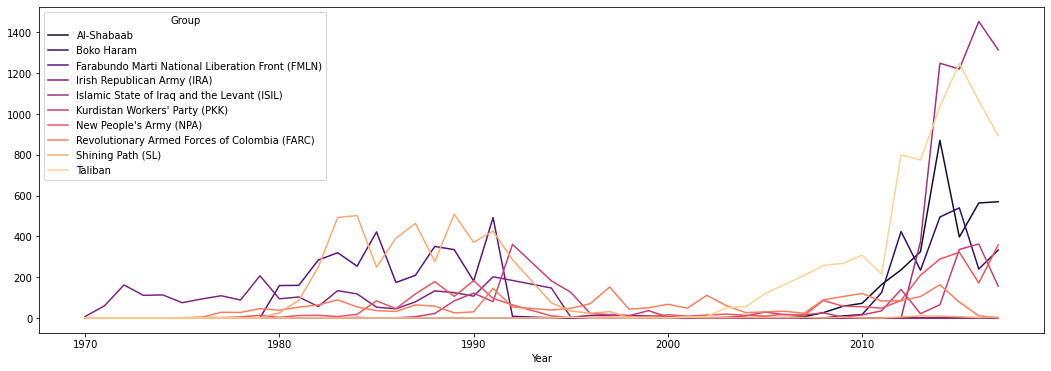

In [124]:
top_groups10=df[Terror['Group'].isin(Terror['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('magma',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

Humanity Affected (World-wide) by Terrorist Attacks from 1970 to 2017

In [125]:
gk=Terror.groupby(by=["Year"], dropna=False,as_index=False).sum()
colors = ['lightslategray',] * 55
colors[43] = 'darkblue'
x=gk['Year']
y=gk['Casualty']
fig = go.Figure(data=[go.Bar(
    x=x.tolist(),
    y=y.tolist(),
    marker_color=colors  # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='Humanity Affected (World-wide) by Terrorist Attacks from 1970 to 2017', xaxis_title="Year",
    yaxis_title="Sum of occurences",)


In [126]:
casualty=Terror.loc[:,"Casualty"].sum()
print("Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :\n",casualty)

Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :
 935737.0


Conclusion
To conclude, we have seen various types of analysis and question and answers with the data set I found interesting. Here is something I feel worth to share. We just look at data set all we can say is that we just know what are the columns and what it contains.So Exploratory Data Analysis is a very efficient way to make our work easy. With python libraries like pandas, numpy, matplotlib, seaborn,plotly allow us to come to conclusions calculating and vizualization.

From the above analysis we conclude that

Iraq country has highest number of attacks (24636)
Middle and East Africa region has highest number of attacks (50474)
Explosives are the most weapon used by terrorsits (92426).
From the analysis we can see that on 2014 the number of terrorist activities were the highest in Iraq Country (16806)
Private citizens and Property were the main targets in terrorism activity (43510)
Bombing and Explosion methods were most commonly used in terrorism activity (82255).
Taliban is most Notorious group with highest number of terrorist activitiies (7478)
Strong security should be given for the countries Iraq,Pakistan,Afghanistan and India and also for middle East Regions and cities like Bhagdad,Karachi lima and many others.

Safety measures have to take regarding explosive devices as bombing explosions are the most weapons used by terrorsits

Strong security should be given to Private citizens and Property ,Military,Police etc as they are main target in terrorism